## Archive Exploration

a. What is the data about?
capture-recapture of snowshoe hares, a keystone species, in Tanana Valley

b. time frame?
1999-2002

c. sensitive data? no

d. publication associated?
yes 

citation: 
Kielland, K., F.S. Chapin, R.W. Ruess, and Bonanza Creek LTER. 2017. Snowshoe hare physical data in Bonanza Creek Experimental Forest: 1999-Present ver 22. Environmental Data Initiative. https://doi.org/10.6073/pasta/03dce4856d79b91557d8e6ce2cbcdc14 (Accessed 2023-10-19).

## Adding an Image

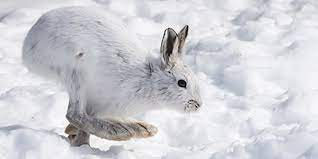

## Data Loading


In [21]:
import pandas as pd
import numpy as np

hares = pd.read_csv('https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-bnz.55.22&entityid=f01f5d71be949b8c700b6ecd1c42c701')

hares.head()

,date,time,grid,trap,l_ear,r_ear,sex,age,weight,hindft,notes,b_key,session_id,study
0,11/26/1998,NaN,bonrip,1A,414D096A08,NaN,NaN,NaN,1370.0,160.0,NaN,917.0,51,Population
1,11/26/1998,NaN,bonrip,2C,414D320671,NaN,M,NaN,1430.0,NaN,NaN,936.0,51,Population
2,11/26/1998,NaN,bonrip,2D,414D103E3A,NaN,M,NaN,1430.0,NaN,NaN,921.0,51,Population
3,11/26/1998,NaN,bonrip,2E,414D262D43,NaN,NaN,NaN,1490.0,135.0,NaN,931.0,51,Population
4,11/26/1998,NaN,bonrip,3B,414D2B4B58,NaN,NaN,NaN,1710.0,150.0,NaN,933.0,51,Population


## Metadate Exploration

Explore descriptions of the dataset's columns

## Detecting Messy Values

1. Get the number of teams each unique non-NA value in the sex column appears by running hares.sex.value_counts().

In [5]:
hares.sex.value_counts()

F     1161
M      730
f      556
m      515
?       40
F?      10
f        4
m        4
f?       3
M?       2
m?       2
pf       1
Name: sex, dtype: int64

In [9]:
hares.sex.value_counts(dropna=False)

F      1161
M       730
f       556
m       515
NaN     352
?        40
F?       10
f         4
m         4
f?        3
M?        2
m?        2
pf        1
Name: sex, dtype: int64

In [10]:
hares.sex.unique()

array([nan, 'M', 'F', '?', 'F?', 'M?', 'pf', 'm', 'f', 'f?', 'm?', 'f ',
       'm '], dtype=object)

5. In the metadata the accepted values are m, f, or m?

## Clean Values



In [34]:
# create a list with the condition
conditions = [
    (hares.sex == 'F') | (hares.sex == 'f') | (hares.sex == 'f ') | (hares.sex == 'f?'),
              (hares.sex == 'M') | (hares.sex == 'M?')
]
             

# create a list with the choices
choices = ['female',
           'male']

len(conditions)
len(choices)

# default = value for anything that falls outside of conditions
hares['sex_simple'] = np.select(conditions, choices, default=np.nan)

hares.head()

,date,time,grid,trap,l_ear,r_ear,sex,age,weight,hindft,notes,b_key,session_id,study,sex_simple
0,11/26/1998,NaN,bonrip,1A,414D096A08,NaN,NaN,NaN,1370.0,160.0,NaN,917.0,51,Population,nan
1,11/26/1998,NaN,bonrip,2C,414D320671,NaN,M,NaN,1430.0,NaN,NaN,936.0,51,Population,male
2,11/26/1998,NaN,bonrip,2D,414D103E3A,NaN,M,NaN,1430.0,NaN,NaN,921.0,51,Population,male
3,11/26/1998,NaN,bonrip,2E,414D262D43,NaN,NaN,NaN,1490.0,135.0,NaN,931.0,51,Population,nan
4,11/26/1998,NaN,bonrip,3B,414D2B4B58,NaN,NaN,NaN,1710.0,150.0,NaN,933.0,51,Population,nan


In [35]:
hares.sex_simple.unique()

array(['nan', 'male', 'female'], dtype=object)

## Calculate Mean Weight

In [36]:
hares.groupby('sex_simple').mean().weight

sex_simple
female    1365.293263
male      1354.047022
nan       1296.776335
Name: weight, dtype: float64